In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import plotly.express as px
import numpy as np

In [3]:
heat_demand = pd.read_csv("eoles/inputs/heat_demand_2050.csv", index_col=0, header=None, names=["heat_type", "demand"])  # final use heat demand, ADEME, GWh-th
# remark: this corresponds to residential + tertiary, and heating + hot water + cooking --> more stuff than simply residential heating
hp_cop = pd.read_csv("eoles/inputs/HP_COP.csv", index_col=0, header=None)  # conversion factor heat pump, depending on temperature
hp_cop = hp_cop.squeeze()
low_heat_demand = (heat_demand.loc[heat_demand.heat_type == "lowT"]).drop(columns=["heat_type"]).squeeze()
percent_hp_RTE = 0.4
percent_resistive_RTE = 0.6
eta_resistive = 0.9

electricity_heat_demand = percent_hp_RTE * (low_heat_demand / hp_cop) + percent_resistive_RTE * (low_heat_demand / eta_resistive)  # GWh

# electricity_heat_demand = electricity_heat_demand + (33.7*1e3 - electricity_heat_demand.sum())/8760  # rescale to fit RTE total demand simply on residential heating

demand_elec_RTE = pd.read_csv("eoles/inputs/demand2050_RTE.csv", index_col=0, header=None)
demand_elec_RTE = demand_elec_RTE.squeeze()
demand_elec_RTE_no_residential_heating = demand_elec_RTE - electricity_heat_demand
print(electricity_heat_demand.sum())

315189.49905188667


In [5]:
low_heat_demand

0       93.914975
1       83.240944
2       85.230537
3       86.722757
4       86.588506
          ...    
8755    86.718834
8756    88.003745
8757    87.191693
8758    86.822001
8759    86.699672
Name: demand, Length: 8760, dtype: float64

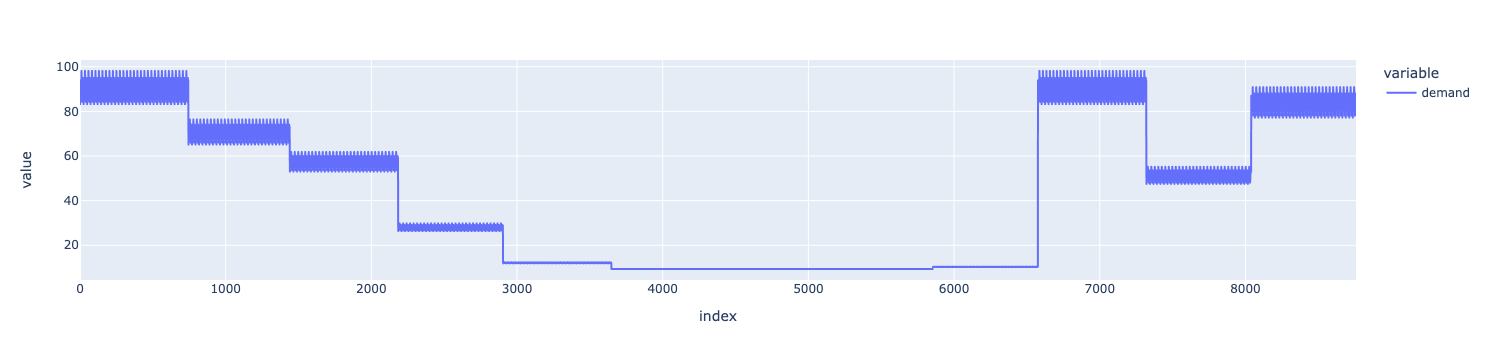

In [7]:
px.line(low_heat_demand)